A simple tutorial on drawing molecules with RDKit. Thanks to ..@iwatobipen for the guidance when starting this project. 

In [49]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import rdDepictor
from rdkit.Chem import rdFMCS
from rdkit.Chem import TemplateAlign

try:
    import psycopg2
except:
    print("Error: You need psycopg2 to run this code")   

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mol2vec.features import mol2alt_sentence, MolSentence, DfVec, sentences2vec
from mol2vec.helpers import depict_identifier, plot_2D_vectors, IdentifierTable, mol_to_svg

Get molecules from the emolecules database already loaded onto postgres


In [10]:
def emolecule_command(sql_command, user, password):
    sql_string = "dbname='emolecules' user={} host='localhost' password={}".format(user, password)
    try:                                                                                                                                            
        conn = psycopg2.connect(sql_string) 
    except:                                                                                                                                         
        print("Did not connect to database")
    emolecules_cur = conn.cursor()
    emolecules_cur.execute(str(sql_command))                                   
    database = emolecules_cur.fetchall()
    return database


In [11]:
def chembl24_command(sql_command, user, password):
    sql_string = "dbname='chembl_24' user={} host='localhost' password={}".format(user, password)
    try:
        conn = psycopg2.connect(sql_string) 
    except:
        print("Could not connect to chembl_24")    
    chembl_cur = conn.cursor()
    chembl_cur.execute(str(sql_command))
    chembl_database = chembl_cur.fetchall()
    return chembl_database


In [12]:
mol = Chem.MolFromSmiles('c1ccccc1')

Drawing modules


In [13]:
try:
    from rdkit import Chem
    from rdkit.Chem.Draw import IPythonConsole
except: 
    print ("You did not load the visualization modules")

In [27]:
smi_path = "/home/oohnohnoh1/Desktop/GIT/rdkit/Data/NCI"

In [28]:
suppl = Chem.SDMolSupplier(smi_path + "/" + "first_200.props.sdf")

In [33]:
suppl

In [42]:
type(suppl)


rdkit.Chem.rdmolfiles.SDMolSupplier

RDKit WARNING: [21:27:39] Warning: molecule is tagged as 3D, but all Z coords are zero


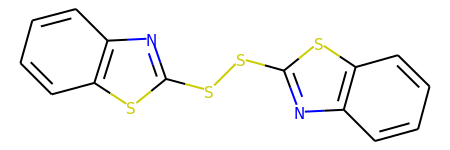

In [43]:
suppl[1]


RDKit WARNING: [21:27:47] Warning: molecule is tagged as 3D, but all Z coords are zero


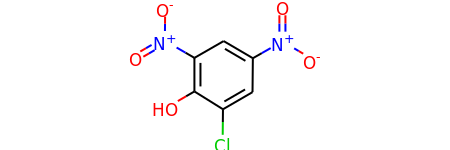

In [44]:
suppl[2]

Let's try to do hetero shuffling - retaining the same structure but changing the functional groups around - for example, changing a carbon for a nitrogen just to give an example


In [50]:
Chem.MolFragmentToSmiles(suppl[2])

RDKit WARNING: [23:17:53] Warning: molecule is tagged as 3D, but all Z coords are zero


ArgumentError: Python argument types in
    rdkit.Chem.rdmolfiles.MolFragmentToSmiles(Mol)
did not match C++ signature:
    MolFragmentToSmiles(RDKit::ROMol mol, boost::python::api::object atomsToUse, boost::python::api::object bondsToUse=0, boost::python::api::object atomSymbols=0, boost::python::api::object bondSymbols=0, bool isomericSmiles=True, bool kekuleSmiles=False, int rootedAtAtom=-1, bool canonical=True, bool allBondsExplicit=False, bool allHsExplicit=False)

In [51]:
type(suppl[2])

RDKit WARNING: [23:18:13] Warning: molecule is tagged as 3D, but all Z coords are zero


rdkit.Chem.rdchem.Mol

In [52]:
sildenafil = Chem.MolFromSmiles('CCCC1=NN(C)C2=C1NC(=NC2=O)C1=C(OCC)C=CC(=C1)S(=O)(=O)N1CCN(C)CC1')
vardenafil = Chem.MolFromSmiles('CCCC1=NC(C)=C2N1NC(=NC2=O)C1=C(OCC)C=CC(=C1)S(=O)(=O)N1CCN(CC)CC1')

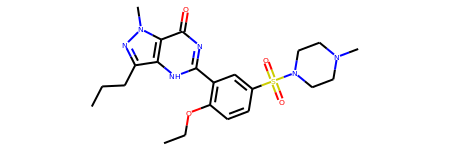

In [54]:
sildenafil

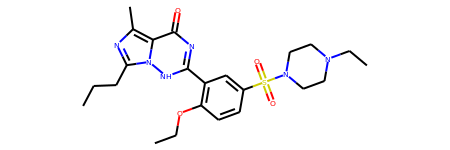

In [55]:
vardenafil